# Exploratory Data Analysis - read dataframes

In [1]:
# imports

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [52]:
# read the CSV files

df = pd.read_csv('cases_with_mask_use.csv')


## mask.csv basic inspection

In [53]:
# check the size of dataframes  
df.shape

(17486, 12)

In [66]:
# check the top 10 lines 
df.head(10)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
0,Santa Clara,151.0,6.0,151,6,2020-03-18,0.015,0.014,0.04,0.168,0.764,1927852
1,Santa Clara,183.0,8.0,32,2,2020-03-19,0.015,0.014,0.04,0.168,0.764,1927852
2,Santa Clara,246.0,8.0,63,0,2020-03-20,0.015,0.014,0.04,0.168,0.764,1927852
3,Santa Clara,269.0,10.0,23,2,2020-03-21,0.015,0.014,0.04,0.168,0.764,1927852
4,Santa Clara,284.0,13.0,15,3,2020-03-22,0.015,0.014,0.04,0.168,0.764,1927852
5,Santa Clara,336.0,13.0,52,0,2020-03-23,0.015,0.014,0.04,0.168,0.764,1927852
6,Santa Clara,389.0,17.0,53,4,2020-03-24,0.015,0.014,0.04,0.168,0.764,1927852
7,Santa Clara,452.0,20.0,63,3,2020-03-25,0.015,0.014,0.04,0.168,0.764,1927852
8,Santa Clara,487.0,20.0,35,0,2020-03-26,0.015,0.014,0.04,0.168,0.764,1927852
9,Santa Clara,557.0,25.0,70,5,2020-03-27,0.015,0.014,0.04,0.168,0.764,1927852


In [13]:
# check how many null values are in each

df.isnull().sum()


county                 0
totalcountconfirmed    0
totalcountdeaths       0
newcountconfirmed      0
newcountdeaths         0
date                   0
NEVER                  0
RARELY                 0
SOMETIMES              0
FREQUENTLY             0
ALWAYS                 0
population             0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   county               17486 non-null  object 
 1   totalcountconfirmed  17486 non-null  float64
 2   totalcountdeaths     17486 non-null  float64
 3   newcountconfirmed    17486 non-null  int64  
 4   newcountdeaths       17486 non-null  int64  
 5   date                 17486 non-null  object 
 6   NEVER                17486 non-null  float64
 7   RARELY               17486 non-null  float64
 8   SOMETIMES            17486 non-null  float64
 9   FREQUENTLY           17486 non-null  float64
 10  ALWAYS               17486 non-null  float64
 11  population           17486 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1.6+ MB


In [15]:
df.nunique()

county                   58
totalcountconfirmed    7956
totalcountdeaths       1269
newcountconfirmed      1313
newcountdeaths          108
date                    302
NEVER                    37
RARELY                   38
SOMETIMES                46
FREQUENTLY               45
ALWAYS                   54
population               58
dtype: int64

In [16]:
df.describe()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
count,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,1.748600e+04
mean,11864.667048,196.650292,161.083438,1.810248,0.032278,0.030698,0.063649,0.158543,0.714797,6.824013e+05
std,45130.684475,784.510735,777.737090,9.369938,0.028532,0.026178,0.033899,0.040410,0.092762,1.456244e+06
min,0.000000,0.000000,-578.000000,-16.000000,0.001000,0.000000,0.004000,0.058000,0.482000,1.129000e+03
25%,83.000000,1.000000,1.000000,0.000000,0.015000,0.013000,0.040000,0.134000,0.661000,4.590500e+04
50%,930.000000,13.000000,13.000000,0.000000,0.023000,0.023000,0.058000,0.156000,0.737000,1.928430e+05
75%,7530.000000,105.000000,81.000000,0.000000,0.043000,0.043000,0.084000,0.186000,0.786000,7.621480e+05
max,937985.000000,12955.000000,28549.000000,318.000000,0.140000,0.135000,0.162000,0.276000,0.889000,1.003911e+07


In [17]:
df.columns

Index(['county', 'totalcountconfirmed', 'totalcountdeaths',
       'newcountconfirmed', 'newcountdeaths', 'date', 'NEVER', 'RARELY',
       'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'population'],
      dtype='object')

In [55]:
df['date'] = pd.to_datetime(df['date'])


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   county               17486 non-null  object        
 1   totalcountconfirmed  17486 non-null  float64       
 2   totalcountdeaths     17486 non-null  float64       
 3   newcountconfirmed    17486 non-null  int64         
 4   newcountdeaths       17486 non-null  int64         
 5   date                 17486 non-null  datetime64[ns]
 6   NEVER                17486 non-null  float64       
 7   RARELY               17486 non-null  float64       
 8   SOMETIMES            17486 non-null  float64       
 9   FREQUENTLY           17486 non-null  float64       
 10  ALWAYS               17486 non-null  float64       
 11  population           17486 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 1.6+ MB


In [29]:
max(df['date'])

Timestamp('2021-01-13 00:00:00')

In [57]:
df_210113 = df.loc[df['date'] == '2021-01-13 00:00:00']

In [58]:
df_210113.shape

(58, 12)

In [59]:
df_210113.drop(['newcountconfirmed', 'newcountdeaths'], axis=1, inplace=True)

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
df_210113['percentconfirmed'] = df_210113['totalcountconfirmed']/df_210113['population']*100
df_210113['percentdeath'] = df_210113['totalcountdeaths']/df_210113['population']*100
df_210113.head()

<ipython-input-60-fa2f39487ca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_210113['percentconfirmed'] = df_210113['totalcountconfirmed']/df_210113['population']*100
<ipython-input-60-fa2f39487ca5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_210113['percentdeath'] = df_210113['totalcountdeaths']/df_210113['population']*100


,county,totalcountconfirmed,totalcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,percentconfirmed,percentdeath
301,Santa Clara,87187.0,1011.0,2021-01-13,0.015,0.014,0.040,0.168,0.764,1927852,4.522494,0.052442
603,San Mateo,30195.0,268.0,2021-01-13,0.016,0.013,0.058,0.126,0.786,766573,3.938959,0.034961
905,Santa Barbara,22714.0,214.0,2021-01-13,0.015,0.020,0.075,0.153,0.737,446499,5.087133,0.047928
1207,Tuolumne,3196.0,36.0,2021-01-13,0.008,0.043,0.084,0.212,0.653,54478,5.866588,0.066082
1508,Sierra,33.0,0.0,2021-01-13,0.140,0.053,0.047,0.143,0.617,3005,1.098170,0.000000


In [61]:
df_topconfirmed = df_210113.sort_values(by=['percentconfirmed'], ascending=False).head(10)
df_topconfirmed

,county,totalcountconfirmed,totalcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,percentconfirmed,percentdeath
8744,Lassen,4663.0,13.0,2021-01-13,0.064,0.068,0.162,0.225,0.482,30573,15.252020,0.042521
17183,Imperial,24717.0,454.0,2021-01-13,0.001,0.005,0.030,0.128,0.836,181215,13.639599,0.250531
14163,Kings,18121.0,110.0,2021-01-13,0.075,0.016,0.049,0.094,0.766,152940,11.848437,0.071924
15673,San Bernardino,240191.0,1551.0,2021-01-13,0.027,0.022,0.048,0.134,0.768,2180085,11.017506,0.071144
13257,Los Angeles,937985.0,12955.0,2021-01-13,0.021,0.013,0.049,0.131,0.786,10039107,9.343311,0.129045
14767,Riverside,228192.0,2307.0,2021-01-13,0.026,0.014,0.041,0.116,0.803,2470546,9.236501,0.093380
14465,Kern,76049.0,550.0,2021-01-13,0.022,0.028,0.105,0.177,0.668,900202,8.447993,0.061097
9935,Tulare,39129.0,482.0,2021-01-13,0.025,0.039,0.115,0.136,0.685,466195,8.393269,0.103390
13861,Merced,22497.0,287.0,2021-01-13,0.026,0.036,0.089,0.146,0.703,277680,8.101772,0.103356
12049,Madera,12570.0,130.0,2021-01-13,0.019,0.059,0.048,0.124,0.751,157327,7.989728,0.082630


In [62]:
df_topdeath = df_210113.sort_values(by=['percentdeath'], ascending=False).head(10)
df_topdeath

,county,totalcountconfirmed,totalcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,percentconfirmed,percentdeath
17183,Imperial,24717.0,454.0,2021-01-13,0.001,0.005,0.030,0.128,0.836,181215,13.639599,0.250531
6328,Inyo,785.0,27.0,2021-01-13,0.033,0.011,0.008,0.058,0.889,18039,4.351682,0.149676
13257,Los Angeles,937985.0,12955.0,2021-01-13,0.021,0.013,0.049,0.131,0.786,10039107,9.343311,0.129045
15975,Stanislaus,40167.0,709.0,2021-01-13,0.032,0.028,0.062,0.173,0.705,550660,7.294338,0.128755
9935,Tulare,39129.0,482.0,2021-01-13,0.025,0.039,0.115,0.136,0.685,466195,8.393269,0.103390
13861,Merced,22497.0,287.0,2021-01-13,0.026,0.036,0.089,0.146,0.703,277680,8.101772,0.103356
6630,San Joaquin,54373.0,736.0,2021-01-13,0.054,0.019,0.081,0.165,0.680,762148,7.134179,0.096569
14767,Riverside,228192.0,2307.0,2021-01-13,0.026,0.014,0.041,0.116,0.803,2470546,9.236501,0.093380
6026,Fresno,78278.0,846.0,2021-01-13,0.021,0.022,0.059,0.156,0.741,999101,7.834844,0.084676
12049,Madera,12570.0,130.0,2021-01-13,0.019,0.059,0.048,0.124,0.751,157327,7.989728,0.082630


In [63]:
df_210113.corr()

,totalcountconfirmed,totalcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,percentconfirmed,percentdeath
totalcountconfirmed,1.000000,0.987438,-0.119247,-0.179807,-0.134655,-0.177120,0.213671,0.979746,0.286501,0.299017
totalcountdeaths,0.987438,1.000000,-0.106314,-0.160560,-0.113540,-0.151684,0.185603,0.963669,0.248880,0.311265
NEVER,-0.119247,-0.106314,1.000000,0.320882,0.208829,0.153812,-0.540059,-0.157575,-0.105173,-0.210515
RARELY,-0.179807,-0.160560,0.320882,1.000000,0.425952,0.378968,-0.700612,-0.219942,-0.161628,-0.329843
SOMETIMES,-0.134655,-0.113540,0.208829,0.425952,1.000000,0.571153,-0.797152,-0.173768,0.216311,-0.052418
FREQUENTLY,-0.177120,-0.151684,0.153812,0.378968,0.571153,1.000000,-0.796528,-0.199263,-0.108190,-0.204273
ALWAYS,0.213671,0.185603,-0.540059,-0.700612,-0.797152,-0.796528,1.000000,0.261031,0.046112,0.265470
population,0.979746,0.963669,-0.157575,-0.219942,-0.173768,-0.199263,0.261031,1.000000,0.229378,0.263463
percentconfirmed,0.286501,0.248880,-0.105173,-0.161628,0.216311,-0.108190,0.046112,0.229378,1.000000,0.588156
percentdeath,0.299017,0.311265,-0.210515,-0.329843,-0.052418,-0.204273,0.265470,0.263463,0.588156,1.000000


[Text(0.5, 1.0, 'County Histogram')]

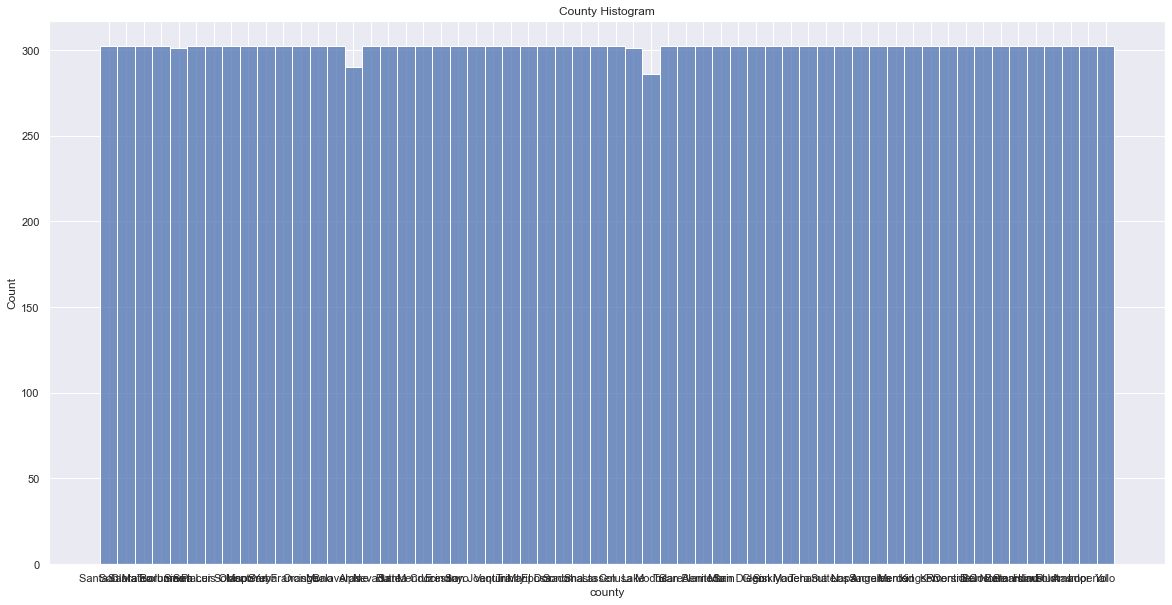

In [24]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(df['county']);
ax.set(title="County Histogram")

(0.0, 100.0)

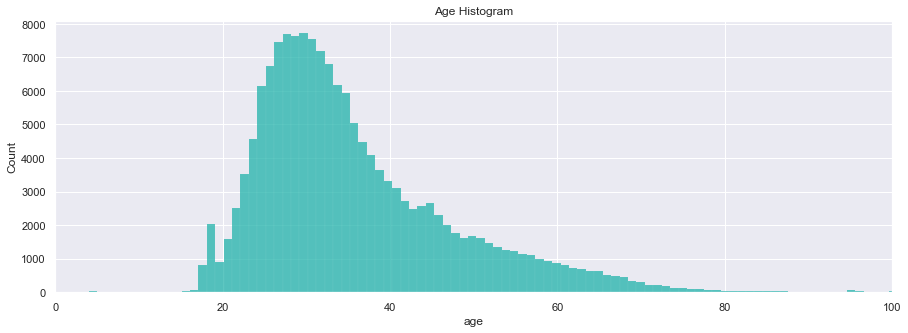

In [72]:

fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['age'], bins=2000, color='lightseagreen');
ax.set(title="Age Histogram")
ax.set_xlim(0,100)


In [108]:
df_country = pd.DataFrame(df['country_destination'].value_counts())
df_country['country'] = df_country.index
df_country.rename(columns={'country_destination':'count'}, inplace=True)

[Text(0.5, 1.0, 'Destination Country Histogram')]

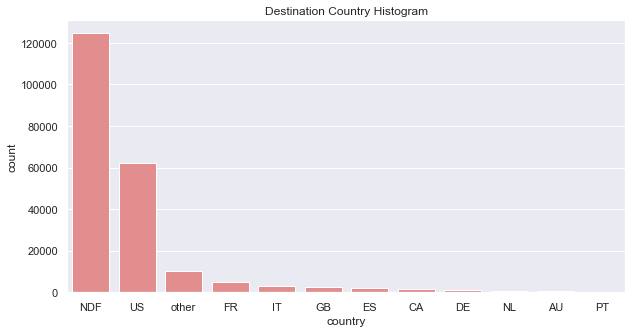

In [121]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_country['country'], y=df_country['count'], color='lightcoral');
ax.set(title="Destination Country Histogram")


[Text(0.5, 1.0, 'Signup Method Histogram')]

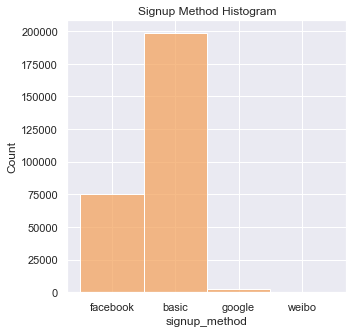

In [120]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df['signup_method'],color='sandybrown');
ax.set(title="Signup Method Histogram")

[Text(0.5, 1.0, 'Affiliate Channel Histogram')]

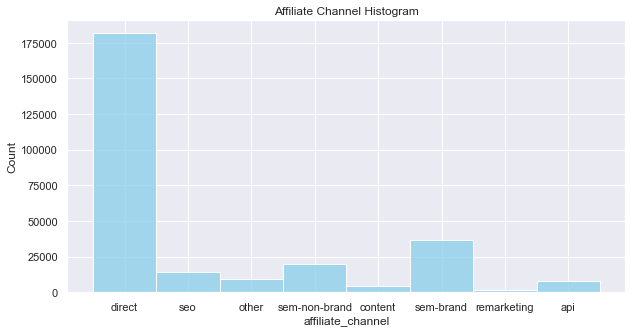

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['affiliate_channel'], color='skyblue');
ax.set(title="Affiliate Channel Histogram")

[Text(0.5, 1.0, 'First Device Type Histogram')]

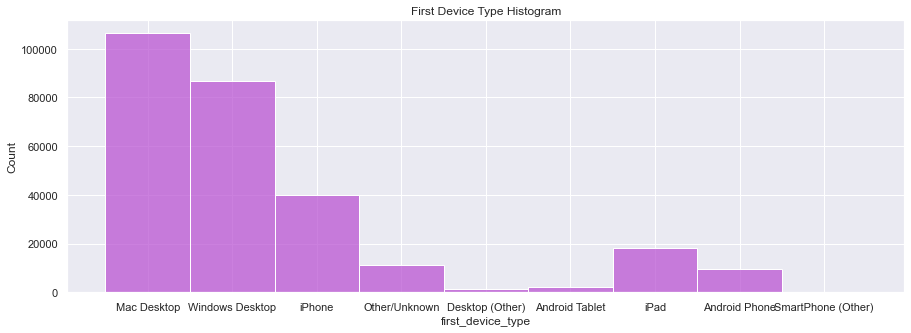

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['first_device_type'], color='mediumorchid');
ax.set(title="First Device Type Histogram")

In [133]:
df['account_create_year'] = df['date_account_created'].dt.year


df_year = df.groupby('account_create_year').count()
df_year['year'] = df_year.index

[Text(0.5, 1.0, 'Year Account Created Histogram')]

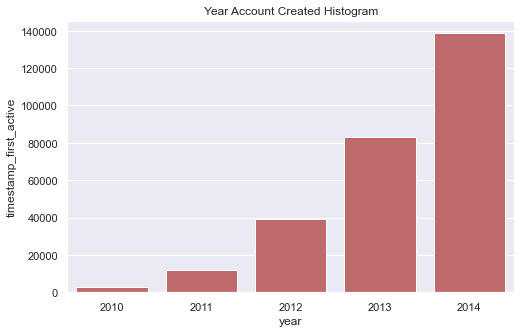

In [136]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='year', y='timestamp_first_active',color='indianred', data=df_year)
ax.set(title="Year Account Created Histogram")

In [168]:
df_age_gender = pd.DataFrame(age_gender.value_counts())
df_age_gender = df_age_gender.sort_values('age_bucket')

In [169]:
df_age_gender.reset_index(inplace=True) 

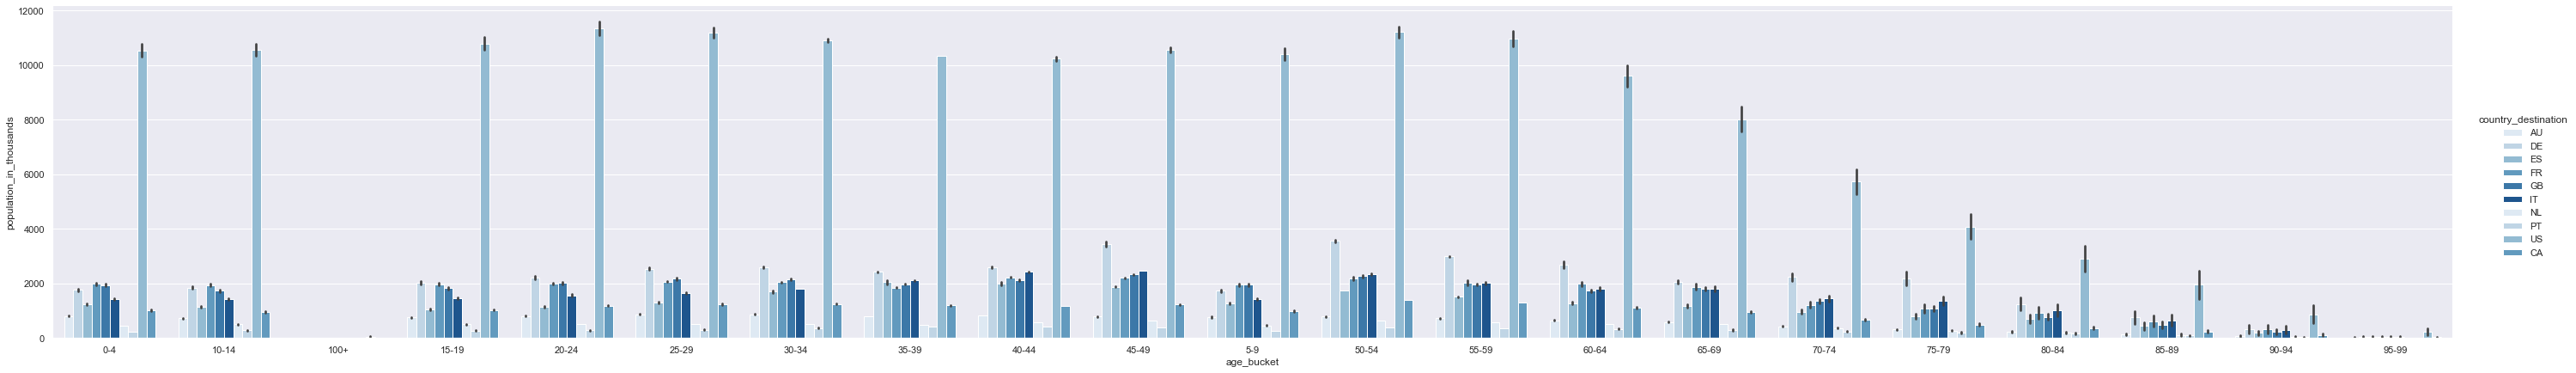

In [170]:
sns.set_palette('Blues')
sns.catplot(x="age_bucket", y="population_in_thousands", kind="bar", hue='country_destination', palette=sns.color_palette("Blues"), data=df_age_gender, height=6, aspect=40/6)